In [ ]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling, BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Making data sets from images that are in folders named as their class_label
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
train_dataset = image_dataset_from_directory(
    'data/interim/train_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 91166 files belonging to 15 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    'data/interim/val_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [ ]:
test_dataset = image_dataset_from_directory(
    'data/interim/test_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=256,
    image_size=(70,70),
    shuffle=False,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [ ]:
# Normalizing images
normalization_layer = layers.Rescaling(1./255)
train_ds_norm = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Setting up model
img_width, img_height = 70, 70
epochs = 200
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 1)

In [ ]:

# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.45))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/a.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 37s 65ms/step - loss: 1.7320 - accuracy: 0.4611 - val_loss: 2.2054 - val_accuracy: 0.2724
Epoch 2/200
357/357 [==============================] - 24s 65ms/step - loss: 1.1569 - accuracy: 0.6273 - val_loss: 0.9640 - val_accuracy: 0.6789
Epoch 3/200
357/357 [==============================] - 24s 66ms/step - loss: 0.9983 - accuracy: 0.6748 - val_loss: 0.8978 - val_accuracy: 0.7003
Epoch 4/200
357/357 [==============================] - 23s 64ms/step - loss: 0.9134 - accuracy: 0.7043 - val_loss: 1.0133 - val_accuracy: 0.6631
Epoch 5/200
357/357 [==============================] - 24s 66ms/step - loss: 0.8460 - accuracy: 0.7269 - val_loss: 0.7374 - val_accuracy: 0.7589
Epoch 6/200
357/357 [==============================] - 24s 66ms/step - loss: 0.8004 - accuracy: 0.7420 - val_loss: 0.6980 - val_accuracy: 0.7669
Epoch 7/200
357/357 [==============================] - 23s 64ms/step - loss: 0.7677 - accuracy: 0.7521 - val_loss: 0.8913 - val_ac

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/a.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.4472 - accuracy: 0.8551 - 1s/epoch - 44ms/step


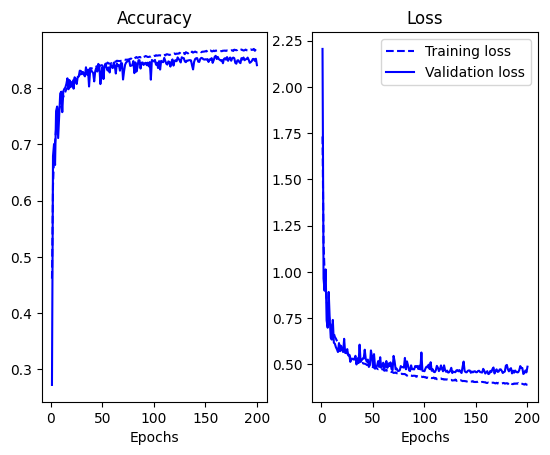

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
fig, (ax1,ax2) = plt.subplots(1,2)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
ax1.plot(epochs, accuracy, 'b--', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax2.plot(epochs, loss, 'b--', label='Training loss')
ax2.plot(epochs, val_loss, 'b',label='Validation loss')
ax1.set_title('Accuracy')
ax2.set_title('Loss')
ax1.set_xlabel('Epochs')

ax2.set_xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/b.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
713/713 [==============================] - 28s 34ms/step - loss: 1.4580 - accuracy: 0.5394 - val_loss: 0.9895 - val_accuracy: 0.6664
Epoch 2/200
713/713 [==============================] - 23s 32ms/step - loss: 1.0254 - accuracy: 0.6646 - val_loss: 1.0011 - val_accuracy: 0.6731
Epoch 3/200
713/713 [==============================] - 23s 33ms/step - loss: 0.8968 - accuracy: 0.7085 - val_loss: 0.8194 - val_accuracy: 0.7281
Epoch 4/200
713/713 [==============================] - 23s 33ms/step - loss: 0.8166 - accuracy: 0.7355 - val_loss: 0.7454 - val_accuracy: 0.7588
Epoch 5/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7602 - accuracy: 0.7551 - val_loss: 0.7551 - val_accuracy: 0.7615
Epoch 6/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7179 - accuracy: 0.7704 - val_loss: 1.0164 - val_accuracy: 0.6868
Epoch 7/200
713/713 [==============================] - 23s 33ms/step - loss: 0.6878 - accuracy: 0.7788 - val_loss: 0.6720 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/b.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.4662 - accuracy: 0.8521 - 1s/epoch - 20ms/step


In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/c.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
713/713 [==============================] - 27s 32ms/step - loss: 1.6105 - accuracy: 0.4905 - val_loss: 1.1931 - val_accuracy: 0.6179
Epoch 2/200
713/713 [==============================] - 24s 33ms/step - loss: 1.1124 - accuracy: 0.6371 - val_loss: 1.0208 - val_accuracy: 0.6747
Epoch 3/200
713/713 [==============================] - 23s 32ms/step - loss: 0.9742 - accuracy: 0.6813 - val_loss: 1.2035 - val_accuracy: 0.6431
Epoch 4/200
713/713 [==============================] - 23s 32ms/step - loss: 0.8948 - accuracy: 0.7073 - val_loss: 0.9834 - val_accuracy: 0.6873
Epoch 5/200
713/713 [==============================] - 24s 33ms/step - loss: 0.8413 - accuracy: 0.7270 - val_loss: 0.7096 - val_accuracy: 0.7715
Epoch 6/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7910 - accuracy: 0.7450 - val_loss: 0.7397 - val_accuracy: 0.7579
Epoch 7/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7568 - accuracy: 0.7560 - val_loss: 0.9143 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/c.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.4678 - accuracy: 0.8485 - 1s/epoch - 20ms/step


In [ ]:
# Saving model
model.save('models/keras/c.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/d.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
713/713 [==============================] - 27s 33ms/step - loss: 1.5078 - accuracy: 0.5253 - val_loss: 1.0060 - val_accuracy: 0.6631
Epoch 2/200
713/713 [==============================] - 23s 33ms/step - loss: 1.0458 - accuracy: 0.6589 - val_loss: 0.9262 - val_accuracy: 0.6965
Epoch 3/200
713/713 [==============================] - 23s 32ms/step - loss: 0.9245 - accuracy: 0.6985 - val_loss: 0.8187 - val_accuracy: 0.7340
Epoch 4/200
713/713 [==============================] - 23s 31ms/step - loss: 0.8458 - accuracy: 0.7264 - val_loss: 0.8541 - val_accuracy: 0.7272
Epoch 5/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7856 - accuracy: 0.7479 - val_loss: 0.7065 - val_accuracy: 0.7640
Epoch 6/200
713/713 [==============================] - 23s 33ms/step - loss: 0.7512 - accuracy: 0.7593 - val_loss: 0.7037 - val_accuracy: 0.7783
Epoch 7/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7141 - accuracy: 0.7690 - val_loss: 0.6457 - val_ac

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/d.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.4495 - accuracy: 0.8537 - 1s/epoch - 21ms/step


In [ ]:
# Saving model
model.save('models/d.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/e.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history1 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
713/713 [==============================] - 27s 32ms/step - loss: 1.4180 - accuracy: 0.5556 - val_loss: 1.0599 - val_accuracy: 0.6408
Epoch 2/200
713/713 [==============================] - 23s 32ms/step - loss: 0.9703 - accuracy: 0.6857 - val_loss: 0.8768 - val_accuracy: 0.7091
Epoch 3/200
713/713 [==============================] - 23s 32ms/step - loss: 0.8392 - accuracy: 0.7288 - val_loss: 0.8464 - val_accuracy: 0.7157
Epoch 4/200
713/713 [==============================] - 23s 32ms/step - loss: 0.7617 - accuracy: 0.7551 - val_loss: 0.7240 - val_accuracy: 0.7600
Epoch 5/200
713/713 [==============================] - 24s 34ms/step - loss: 0.7143 - accuracy: 0.7709 - val_loss: 0.6285 - val_accuracy: 0.7919
Epoch 6/200
713/713 [==============================] - 23s 31ms/step - loss: 0.6652 - accuracy: 0.7860 - val_loss: 0.6342 - val_accuracy: 0.7921
Epoch 7/200
713/713 [==============================] - 23s 31ms/step - loss: 0.6317 - accuracy: 0.7965 - val_loss: 0.6845 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/e.keras')

FileNotFoundError: ignored

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.6120 - accuracy: 0.8291 - 1s/epoch - 20ms/step


In [ ]:
# Saving model
model.save('models/e.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/f.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history2 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 41s 76ms/step - loss: 1.5529 - accuracy: 0.5178 - val_loss: 1.7670 - val_accuracy: 0.4092
Epoch 2/200
357/357 [==============================] - 28s 78ms/step - loss: 1.0601 - accuracy: 0.6541 - val_loss: 0.8501 - val_accuracy: 0.7064
Epoch 3/200
357/357 [==============================] - 28s 77ms/step - loss: 0.9061 - accuracy: 0.7039 - val_loss: 1.1810 - val_accuracy: 0.6255
Epoch 4/200
357/357 [==============================] - 29s 80ms/step - loss: 0.8153 - accuracy: 0.7353 - val_loss: 0.7647 - val_accuracy: 0.7516
Epoch 5/200
357/357 [==============================] - 29s 79ms/step - loss: 0.7454 - accuracy: 0.7589 - val_loss: 0.6587 - val_accuracy: 0.7811
Epoch 6/200
357/357 [==============================] - 28s 77ms/step - loss: 0.6982 - accuracy: 0.7728 - val_loss: 0.6869 - val_accuracy: 0.7741
Epoch 7/200
357/357 [==============================] - 28s 77ms/step - loss: 0.6610 - accuracy: 0.7856 - val_loss: 0.7294 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/e.keras')

ValueError: ignored

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.6176 - accuracy: 0.8315 - 1s/epoch - 41ms/step


In [ ]:
# Saving model
model.save('models/e.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/f.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history2 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 33s 84ms/step - loss: 1.7407 - accuracy: 0.4577 - val_loss: 2.6214 - val_accuracy: 0.3011
Epoch 2/200
357/357 [==============================] - 29s 81ms/step - loss: 1.2061 - accuracy: 0.6028 - val_loss: 1.0390 - val_accuracy: 0.6419
Epoch 3/200
357/357 [==============================] - 29s 81ms/step - loss: 1.0482 - accuracy: 0.6529 - val_loss: 1.0074 - val_accuracy: 0.6779
Epoch 4/200
357/357 [==============================] - 29s 80ms/step - loss: 0.9469 - accuracy: 0.6888 - val_loss: 0.7688 - val_accuracy: 0.7459
Epoch 5/200
357/357 [==============================] - 29s 80ms/step - loss: 0.8751 - accuracy: 0.7120 - val_loss: 0.7671 - val_accuracy: 0.7431
Epoch 6/200
357/357 [==============================] - 29s 80ms/step - loss: 0.8187 - accuracy: 0.7331 - val_loss: 0.7085 - val_accuracy: 0.7653
Epoch 7/200
357/357 [==============================] - 28s 78ms/step - loss: 0.7709 - accuracy: 0.7502 - val_loss: 0.7371 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/f.keras')


In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.5061 - accuracy: 0.8417 - 1s/epoch - 42ms/step


In [ ]:
# Saving model
model.save('models/f.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/g.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history2 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 33s 84ms/step - loss: 1.7702 - accuracy: 0.4405 - val_loss: 2.4519 - val_accuracy: 0.2541
Epoch 2/200
357/357 [==============================] - 30s 83ms/step - loss: 1.2548 - accuracy: 0.5841 - val_loss: 1.0950 - val_accuracy: 0.6231
Epoch 3/200
357/357 [==============================] - 30s 82ms/step - loss: 1.1017 - accuracy: 0.6341 - val_loss: 0.9217 - val_accuracy: 0.6767
Epoch 4/200
357/357 [==============================] - 30s 82ms/step - loss: 0.9941 - accuracy: 0.6735 - val_loss: 0.8162 - val_accuracy: 0.7272
Epoch 5/200
357/357 [==============================] - 30s 82ms/step - loss: 0.9104 - accuracy: 0.7015 - val_loss: 0.8159 - val_accuracy: 0.7311
Epoch 6/200
357/357 [==============================] - 30s 82ms/step - loss: 0.8549 - accuracy: 0.7184 - val_loss: 0.7550 - val_accuracy: 0.7595
Epoch 7/200
357/357 [==============================] - 30s 82ms/step - loss: 0.8109 - accuracy: 0.7378 - val_loss: 0.6707 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/g.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.5095 - accuracy: 0.8408 - 1s/epoch - 41ms/step


In [ ]:
# Saving model
model.save('models/g.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/h.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history2 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 32s 81ms/step - loss: 1.7740 - accuracy: 0.4404 - val_loss: 2.5138 - val_accuracy: 0.2095
Epoch 2/200
357/357 [==============================] - 30s 83ms/step - loss: 1.2492 - accuracy: 0.5895 - val_loss: 1.0677 - val_accuracy: 0.6220
Epoch 3/200
357/357 [==============================] - 30s 83ms/step - loss: 1.0727 - accuracy: 0.6461 - val_loss: 0.9059 - val_accuracy: 0.7061
Epoch 4/200
357/357 [==============================] - 30s 84ms/step - loss: 0.9569 - accuracy: 0.6870 - val_loss: 0.8296 - val_accuracy: 0.7203
Epoch 5/200
357/357 [==============================] - 30s 83ms/step - loss: 0.8696 - accuracy: 0.7167 - val_loss: 0.7304 - val_accuracy: 0.7491
Epoch 6/200
357/357 [==============================] - 29s 80ms/step - loss: 0.8063 - accuracy: 0.7380 - val_loss: 0.8169 - val_accuracy: 0.7301
Epoch 7/200
357/357 [==============================] - 30s 83ms/step - loss: 0.7519 - accuracy: 0.7566 - val_loss: 0.6573 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/h.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.5268 - accuracy: 0.8376 - 1s/epoch - 41ms/step


In [ ]:
# Saving model
model.save('models/h.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/i.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history2 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 32s 82ms/step - loss: 1.6915 - accuracy: 0.4796 - val_loss: 2.8780 - val_accuracy: 0.1881
Epoch 2/200
357/357 [==============================] - 30s 83ms/step - loss: 1.1600 - accuracy: 0.6218 - val_loss: 0.9487 - val_accuracy: 0.6875
Epoch 3/200
357/357 [==============================] - 30s 82ms/step - loss: 0.9928 - accuracy: 0.6776 - val_loss: 0.8242 - val_accuracy: 0.7247
Epoch 4/200
357/357 [==============================] - 30s 83ms/step - loss: 0.8892 - accuracy: 0.7076 - val_loss: 0.7893 - val_accuracy: 0.7300
Epoch 5/200
357/357 [==============================] - 30s 82ms/step - loss: 0.8219 - accuracy: 0.7327 - val_loss: 0.7688 - val_accuracy: 0.7447
Epoch 6/200
357/357 [==============================] - 30s 83ms/step - loss: 0.7698 - accuracy: 0.7503 - val_loss: 0.7510 - val_accuracy: 0.7492
Epoch 7/200
357/357 [==============================] - 30s 83ms/step - loss: 0.7281 - accuracy: 0.7643 - val_loss: 0.7475 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/h.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.5168 - accuracy: 0.8405 - 1s/epoch - 40ms/step


In [ ]:
# Saving model
model.save('models/keras/h.keras')

In [ ]:
# Setting up model
img_width, img_height = 70, 70
epochs = 200
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 1)

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/i.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 28s 65ms/step - loss: 1.5629 - accuracy: 0.5103 - val_loss: 2.1090 - val_accuracy: 0.3393
Epoch 2/200
357/357 [==============================] - 24s 65ms/step - loss: 1.0675 - accuracy: 0.6529 - val_loss: 0.9357 - val_accuracy: 0.6648
Epoch 3/200
357/357 [==============================] - 23s 64ms/step - loss: 0.9315 - accuracy: 0.6958 - val_loss: 0.8541 - val_accuracy: 0.7143
Epoch 4/200
357/357 [==============================] - 23s 64ms/step - loss: 0.8480 - accuracy: 0.7267 - val_loss: 0.7463 - val_accuracy: 0.7504
Epoch 5/200
357/357 [==============================] - 24s 65ms/step - loss: 0.7876 - accuracy: 0.7453 - val_loss: 0.6954 - val_accuracy: 0.7659
Epoch 6/200
357/357 [==============================] - 23s 62ms/step - loss: 0.7454 - accuracy: 0.7619 - val_loss: 0.7308 - val_accuracy: 0.7531
Epoch 7/200
357/357 [==============================] - 23s 62ms/step - loss: 0.7089 - accuracy: 0.7716 - val_loss: 0.7110 - val_ac

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/i.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.4810 - accuracy: 0.8476 - 1s/epoch - 44ms/step


In [ ]:
# Saving model
model.save('models/i.keras')

In [ ]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Saving the weights for the lowest loss value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/keras/j.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
# Running model
history2 = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
357/357 [==============================] - 25s 56ms/step - loss: 1.9115 - accuracy: 0.4128 - val_loss: 2.0859 - val_accuracy: 0.3457
Epoch 2/200
357/357 [==============================] - 21s 57ms/step - loss: 1.2892 - accuracy: 0.5893 - val_loss: 1.1201 - val_accuracy: 0.6269
Epoch 3/200
357/357 [==============================] - 20s 56ms/step - loss: 1.1189 - accuracy: 0.6393 - val_loss: 0.9717 - val_accuracy: 0.6651
Epoch 4/200
357/357 [==============================] - 20s 56ms/step - loss: 1.0262 - accuracy: 0.6695 - val_loss: 0.9340 - val_accuracy: 0.6793
Epoch 5/200
357/357 [==============================] - 21s 57ms/step - loss: 0.9587 - accuracy: 0.6905 - val_loss: 0.8819 - val_accuracy: 0.7071
Epoch 6/200
357/357 [==============================] - 21s 58ms/step - loss: 0.9162 - accuracy: 0.7050 - val_loss: 0.8453 - val_accuracy: 0.7153
Epoch 7/200
357/357 [==============================] - 21s 58ms/step - loss: 0.8785 - accuracy: 0.7174 - val_loss: 0.7536 - val_ac

In [ ]:
# Loading the best weights for this model
model.load_weights('models/keras/j.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.4662 - accuracy: 0.8521 - 1s/epoch - 20ms/step


In [ ]:
# Saving model
model.save('models/j.keras')

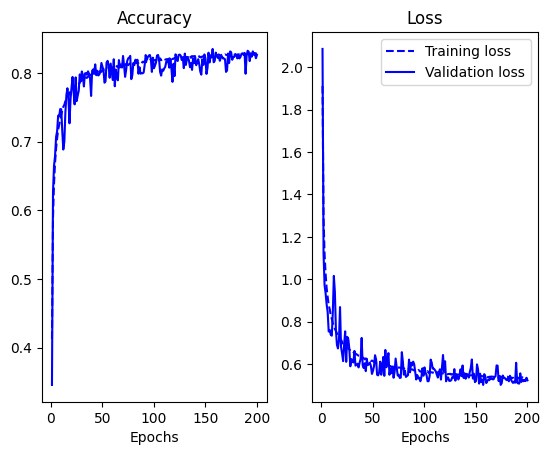

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
fig, (ax1,ax2) = plt.subplots(1,2)
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(accuracy) + 1)
ax1.plot(epochs, accuracy, 'b--', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax2.plot(epochs, loss, 'b--', label='Training loss')
ax2.plot(epochs, val_loss, 'b',label='Validation loss')
ax1.set_title('Accuracy')
ax2.set_title('Loss')
ax1.set_xlabel('Epochs')

ax2.set_xlabel('Epochs')

plt.legend()
plt.show()